# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [ ]:
import pandas as pd

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
builders = tfds.list_builders()
print(builders)

2023-06-19 23:16:59.925833: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar100_n', 'cifar10_1', 'cifar10_corrupted', 'cifar10_n', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'conll2002', 'conll2003', 'controlled_noisy_web_labels', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d

In [3]:
data, info = tfds.load(name="mnist", with_info=True)
train_data, test_data = data["train"], data["test"]

In [4]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/yanghaejun/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [5]:
num_list = np.arange(20)

In [6]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)
num_list_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [7]:
for data in num_list_dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [8]:
import itertools

def gen():
    for i in itertools.count(1):
        yield (i, [1] * i)
    
dataset = tf.data.Dataset.from_generator(gen,
                                         output_types=(tf.int64, tf.int64),
                                         output_shapes=(tf.TensorShape([]), tf.TensorShape([None])))
list(dataset.take(3).as_numpy_iterator())

2023-06-19 16:19:05.246976: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [9]:
for data in dataset:
    print(data)

(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=3>, <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=4>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=5>, <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=6>, <tf.Tensor: shape=(6,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=7>, <tf.Tensor: shape=(7,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=8>, <tf.Tensor: shape=(8,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=9>, <tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 1

KeyboardInterrupt: 

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [10]:
dataset = np.arange(20)
dataset

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [11]:
dataset = num_list_dataset.repeat(3).batch(7)

In [12]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [13]:
from tensorflow.data import Dataset

In [14]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [15]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

list(result.as_numpy_iterator())

[1, 2, 3, 4, 5]

In [16]:
elements = [(1, "One"), (2, "Two"), (3, "Three")]
dataset = Dataset.from_generator(lambda: elements,
                                 output_types=(tf.int32, tf.string))

result = dataset.map(lambda x_int, x_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [17]:
dataset = Dataset.range(5)

def g(x):
    return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [18]:
def h(x):
    return 10.5, ["One", "Two", "Three"], np.array([1.0, 2.0], dtype=np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [19]:
def i(x):
    return (10.5, [12, 11]), "One", "Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [20]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4, 5])
dataset = dataset.filter(lambda x: x > 2)
list(dataset.as_numpy_iterator())

[3, 4, 5]

In [21]:
dataset = Dataset.range(1, 6)

def filter_fn(x):
    return tf.math.equal(x, 1)

result = dataset.filter(filter_fn)
list(result.as_numpy_iterator())

[1]

### shuffle, take

In [22]:
dataset, info = tfds.load(name="imdb_reviews", with_info=True, as_supervised=True)

In [23]:
train_dataset = dataset["train"]
test_dataset = dataset["test"].batch(5).shuffle(5).take(2)

for data in test_dataset:
    print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"I really tried, but this movie just didn't work for me. The action scenes were dull, the acting was surprisingly poor, and some of these characters were TOO stereotypical to even be funny. Pam Grier tries, but when you have nothing to work with, even her considerable talent cannot prevent a disaster. Even by the standards of this weak genre, this film is pretty bad.",
       b'This classic has so many great one-liners and unintentionally hilarious scenes that I don\'t even know where to start. If you want advice on dating, its here. Just totally ignore the person you want, and then spout out classic lines like "Chicken\'s good...I like Chicken", and before you know it you will be having a one-nighter in a basement (it\'s a NICE basement) with a woman who is 35 years younger than you. Bronson does it all in this film. He buys a car for no good reason just so he can murder two gang members...paying with "CASH"......chunnng.... He buy

2023-06-19 16:19:20.660681: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### get_next()

In [24]:
dataset = Dataset.range(2)

for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [25]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [26]:
dataset = np.random.randint(1, 10, size=(2, 3))
print(dataset)

dataset = Dataset.from_tensor_slices(dataset)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())

[[9 8 3]
 [2 5 7]]
tf.Tensor([9 8 3], shape=(3,), dtype=int64)
tf.Tensor([2 5 7], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [9]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_13133/1949273025.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


### 데이터 로드

In [6]:
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [8]:
x_train, x_test = x_train / 255., x_test / 255.

### tf.data 이용

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(32).shuffle(1000)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### 데이터 확인

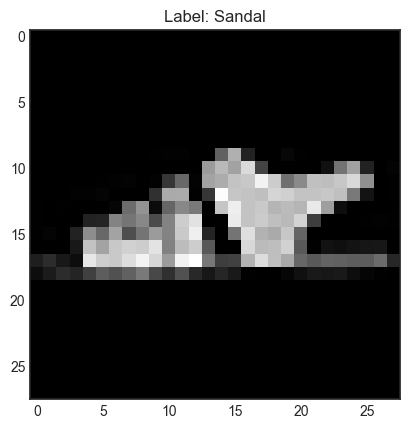

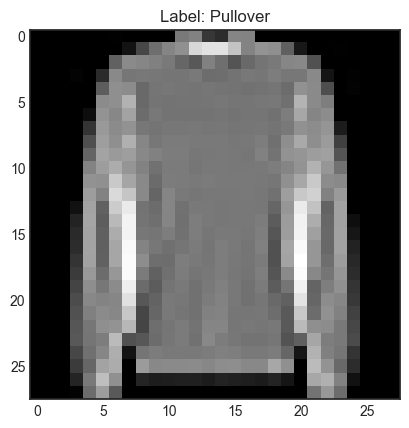

In [11]:
for img, label in train_dataset.take(2):
    plt.imshow(img[0], cmap="gray")
    plt.title("Label: {}".format(class_names[label[0]]))
    plt.show()

### 모델 생성
- 임의의 모델

In [12]:
def build_model():
    input = Input(shape=(28, 28), name="input")
    flatten = Flatten(name="flatten")(input)
    
    hidden1 = Dense(256, kernel_initializer="he_normal", name="hidden1")(flatten)
    hidden1 = BatchNormalization()(hidden1)
    hidden1 = Activation(activation="relu")(hidden1)
    dropout1 = Dropout(rate=0.5)(hidden1)

    hidden2 = Dense(256, kernel_initializer="he_normal", name="hidden2")(dropout1)
    hidden2 = BatchNormalization()(hidden2)
    hidden2 = Activation(activation="relu")(hidden2)
    dropout2 = Dropout(rate=0.5)(hidden2)

    hidden3 = Dense(256, kernel_initializer="he_normal", name="hidden3")(dropout2)
    hidden3 = BatchNormalization()(hidden3)
    hidden3 = Activation(activation="relu")(hidden3)
    dropout3 = Dropout(rate=0.5)(hidden3)

    hidden4 = Dense(256, kernel_initializer="he_normal", name="hidden4")(dropout3)
    hidden4 = BatchNormalization()(hidden4)
    hidden4 = Activation(activation="relu")(hidden4)
    dropout4 = Dropout(rate=0.5)(hidden4)

    output = Dense(10, activation="softmax", name="output")(dropout4)

    model = Model(inputs=[input], outputs=[output])

    return model

In [35]:
model = build_model()

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [36]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
opimizer = tf.keras.optimizers.legacy.Adam()

train_loss = tf.keras.metrics.Mean(name="train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")

test_loss = tf.keras.metrics.Mean(name="test_loss")
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="test_accuracy")

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [37]:
@tf.function
def train_steps(images, labels):
    with tf.GradientTape() as tape:
        pred_y = model(images)
        true_y = labels
        loss = loss_object(true_y, pred_y)
    
    grads = tape.gradient(loss, model.trainable_variables)

    opimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_loss(loss)
    train_accuracy(true_y, pred_y)

In [38]:
@tf.function
def test_steps(images, labels):
    pred_y = model(images)
    true_y = labels
    loss = loss_object(true_y, pred_y)

    test_loss(loss)
    test_accuracy(true_y, pred_y)

In [39]:
epochs = 20

for epoch in range(epochs):
    for images, labels in train_dataset:
        train_steps(images, labels)
    
    for images, labels in test_dataset:
        test_steps(images, labels)
    
    print("Epoch: {:3d}\tTrain Loss: {:.4f}\tTrain Accuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}".format(epoch + 1,
                                                                                                                      train_loss.result(),
                                                                                                                      train_accuracy.result()*100,
                                                                                                                      test_loss.result(),
                                                                                                                      test_accuracy.result()*100))

Epoch:   1	Train Loss: 0.4824	Train Accuracy: 82.4983	Test Loss: 0.4052	Test Accuracy: 85.8900
Epoch:   2	Train Loss: 0.4263	Train Accuracy: 84.4358	Test Loss: 0.4132	Test Accuracy: 85.2900
Epoch:   3	Train Loss: 0.3954	Train Accuracy: 85.5528	Test Loss: 0.4081	Test Accuracy: 85.4267
Epoch:   4	Train Loss: 0.3745	Train Accuracy: 86.2992	Test Loss: 0.3974	Test Accuracy: 85.7800
Epoch:   5	Train Loss: 0.3583	Train Accuracy: 86.8367	Test Loss: 0.3906	Test Accuracy: 86.0020
Epoch:   6	Train Loss: 0.3454	Train Accuracy: 87.2850	Test Loss: 0.3870	Test Accuracy: 86.1767
Epoch:   7	Train Loss: 0.3339	Train Accuracy: 87.6717	Test Loss: 0.3813	Test Accuracy: 86.4286
Epoch:   8	Train Loss: 0.3241	Train Accuracy: 88.0125	Test Loss: 0.3770	Test Accuracy: 86.6438
Epoch:   9	Train Loss: 0.3156	Train Accuracy: 88.3054	Test Loss: 0.3733	Test Accuracy: 86.8367
Epoch:  10	Train Loss: 0.3078	Train Accuracy: 88.5865	Test Loss: 0.3713	Test Accuracy: 86.9510
Epoch:  11	Train Loss: 0.3007	Train Accuracy: 88.8

### 모델 학습 : 2번째 방법 (Keras)

In [10]:
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train_full, x_test = x_train_full / 255., x_test / 255.

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)
(42000,)
(18000,)
(10000,)


In [13]:
model = build_model()

model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

5~6분 소요

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)

model_hist = model.fit(x_train, y_train,
                       epochs=200,
                       batch_size=256,
                       validation_data=(x_val, y_val),
                       shuffle=True,
                       callbacks=[earlystopping])

Epoch 1/200


2023-06-19 23:17:56.178191: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


165/165 [==============================] - 5s 23ms/step - loss: 1.0870 - accuracy: 0.6155 - val_loss: 0.5624 - val_accuracy: 0.7945
Epoch 2/200
165/165 [==============================] - 3s 20ms/step - loss: 0.5809 - accuracy: 0.7933 - val_loss: 0.4671 - val_accuracy: 0.8354
Epoch 3/200
165/165 [==============================] - 3s 19ms/step - loss: 0.5012 - accuracy: 0.8221 - val_loss: 0.4163 - val_accuracy: 0.8473
Epoch 4/200
165/165 [==============================] - 3s 19ms/step - loss: 0.4633 - accuracy: 0.8361 - val_loss: 0.3921 - val_accuracy: 0.8587
Epoch 5/200
165/165 [==============================] - 3s 19ms/step - loss: 0.4323 - accuracy: 0.8465 - val_loss: 0.3913 - val_accuracy: 0.8595
Epoch 6/200
165/165 [==============================] - 3s 19ms/step - loss: 0.4115 - accuracy: 0.8534 - val_loss: 0.3857 - val_accuracy: 0.8587
Epoch 7/200
165/165 [==============================] - 3s 19ms/step - loss: 0.3971 - accuracy: 0.8576 - val_loss: 0.3657 - val_accuracy: 0.8698
Epoc

KeyboardInterrupt: 

In [43]:
model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 평가

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3536 - accuracy: 0.8741


[0.3535718023777008, 0.8741000294685364]

### Test Batch Dataset 결과 확인

In [45]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]

test_batch.shape

(32, 28, 28)

In [46]:
test_batch_y

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8], dtype=uint8)

1/1 [==============================] - 0s 140ms/step


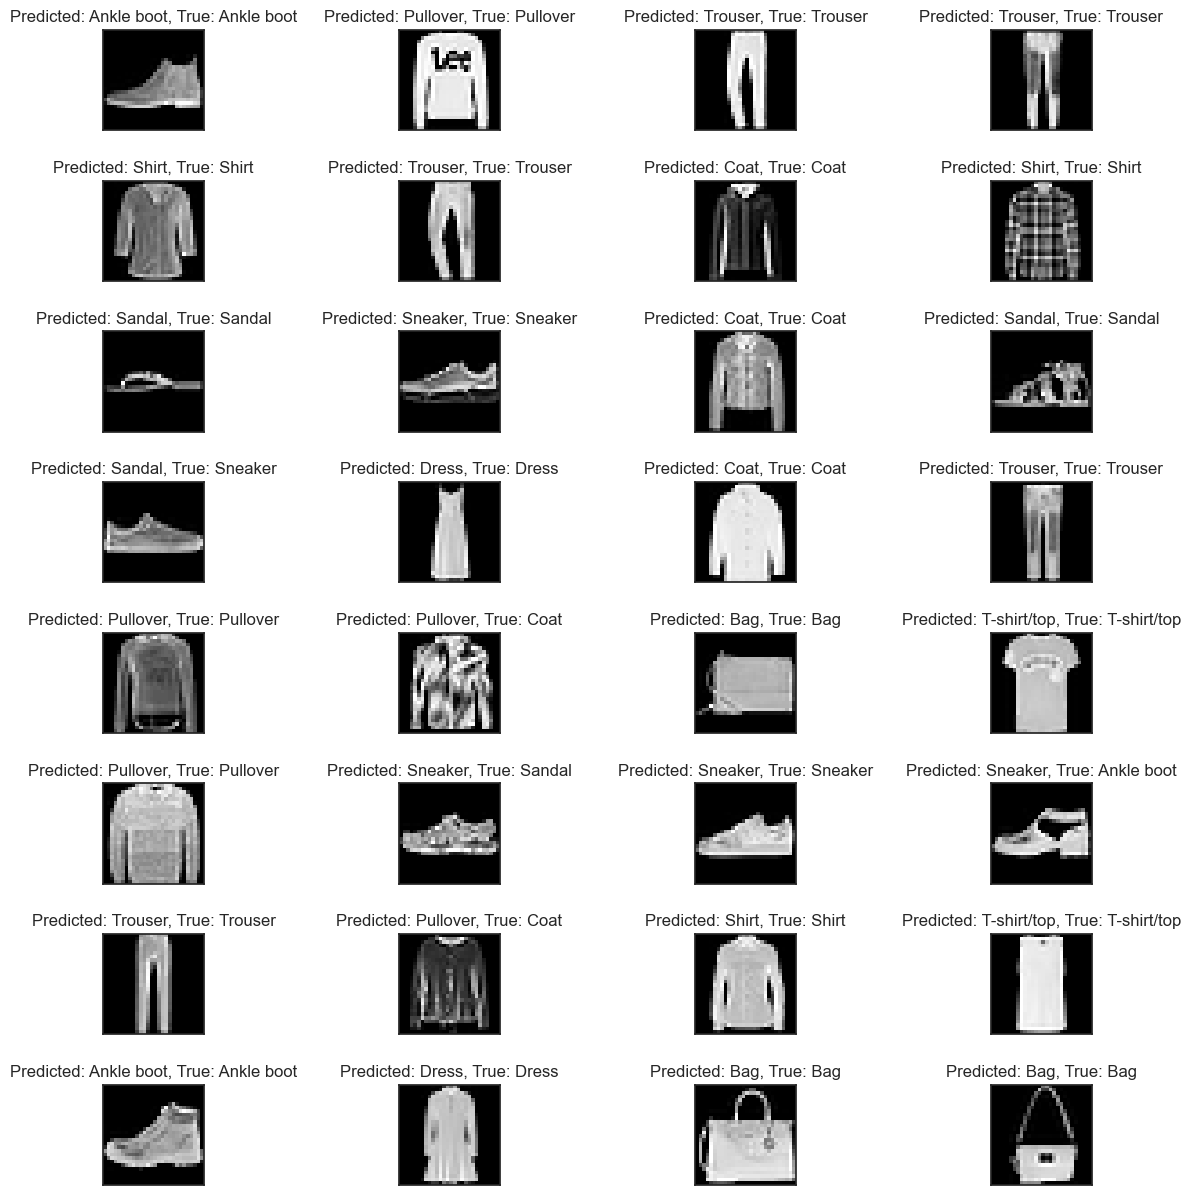

In [47]:
predictions = model.predict(test_batch)
preds = predictions.argmax(axis=1)

num_cols = 4
num_rows = 8

plt.figure(figsize=(14, 15))

for idx, val in enumerate(preds):
    plt.subplot(num_rows, num_cols, idx+1)
    plt.imshow(test_batch[idx], cmap="gray")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title("Predicted: {}, True: {}".format(class_names[val],
                                               class_names[test_batch_y[idx]]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = model.predict(x_test)
preds = predictions.argmax(axis=1)

true_y = y_test

confmat = confusion_matrix(true_y, preds)

print(classification_report(true_y, preds))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.77      0.78      1000
           3       0.86      0.91      0.88      1000
           4       0.78      0.80      0.79      1000
           5       0.99      0.91      0.95      1000
           6       0.68      0.70      0.69      1000
           7       0.88      0.98      0.93      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



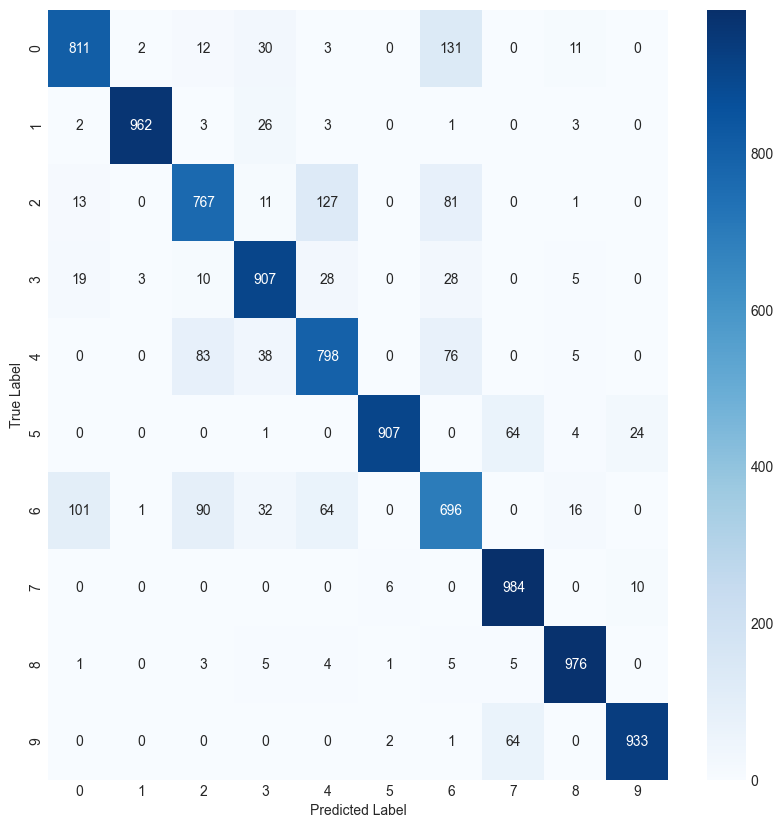

In [49]:
plt.figure(figsize=(10, 10))
sns.heatmap(confmat, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()